In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.shape

(215, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
df=df.drop(['sl_no'],axis=1)

In [6]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


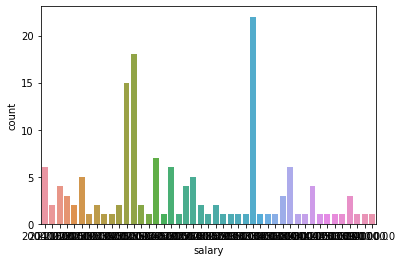

In [8]:
sns.countplot(df['salary'])

In [9]:
df['salary'].value_counts()

300000.0    22
250000.0    18
240000.0    15
260000.0     7
265000.0     6
200000.0     6
360000.0     6
220000.0     5
275000.0     5
270000.0     4
210000.0     4
400000.0     4
350000.0     3
216000.0     3
500000.0     3
280000.0     2
236000.0     2
218000.0     2
252000.0     2
204000.0     2
230000.0     2
276000.0     2
231000.0     1
380000.0     1
411000.0     1
650000.0     1
393000.0     1
225000.0     1
336000.0     1
264000.0     1
278000.0     1
287000.0     1
940000.0     1
340000.0     1
285000.0     1
425000.0     1
290000.0     1
690000.0     1
233000.0     1
255000.0     1
295000.0     1
450000.0     1
268000.0     1
420000.0     1
320000.0     1
Name: salary, dtype: int64

In [10]:
df['salary'].fillna(df['salary'].mean(),inplace=True)

In [11]:
df['salary'].shape

(215,)

In [12]:
df['salary'].describe()

count       215.000000
mean     288655.405405
std       77457.900102
min      200000.000000
25%      250000.000000
50%      288655.405405
75%      288655.405405
max      940000.000000
Name: salary, dtype: float64

In [13]:
obj=df.select_dtypes(include='object')
num=df.select_dtypes(exclude='object')

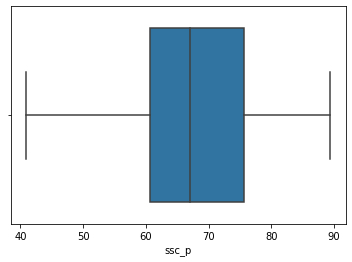

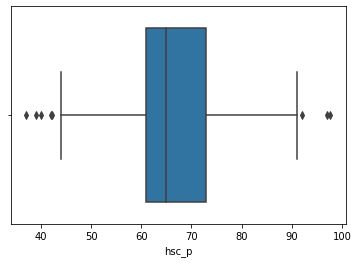

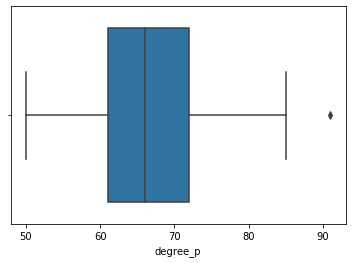

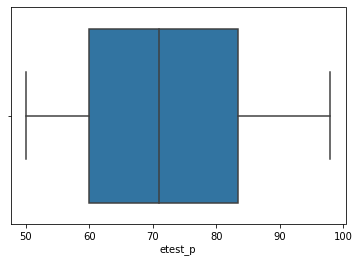

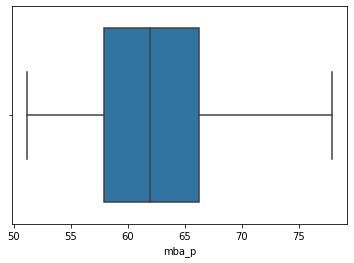

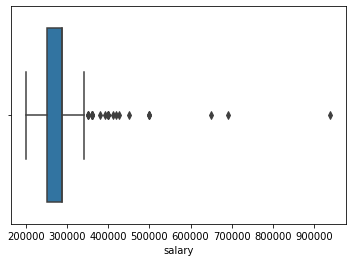

In [14]:
for i in num:
    plt.figure()
    sns.boxplot(num[i])

In [15]:
from scipy import stats
z=np.abs(stats.zscore(num))

In [16]:
np.where(z>3)

(array([119, 150, 177, 197], dtype=int64), array([5, 5, 5, 2], dtype=int64))

In [17]:
df=df[(z<3).all(axis=1)]

In [18]:
df.shape

(211, 14)

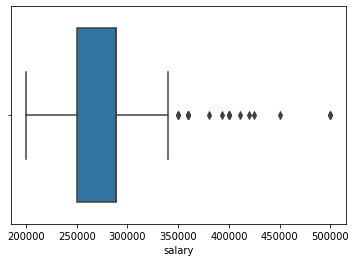

In [19]:
sns.boxplot(df['salary'])

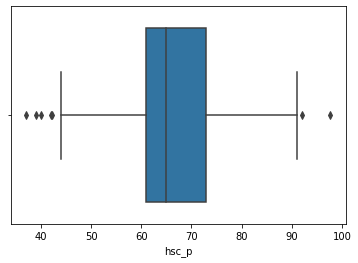

In [20]:
sns.boxplot(df['hsc_p'])

In [21]:
for i in obj:
    print(df[i].value_counts())

M    137
F     74
Name: gender, dtype: int64
Central    113
Others      98
Name: ssc_b, dtype: int64
Others     129
Central     82
Name: hsc_b, dtype: int64
Commerce    111
Science      89
Arts         11
Name: hsc_s, dtype: int64
Comm&Mgmt    143
Sci&Tech      57
Others        11
Name: degree_t, dtype: int64
No     140
Yes     71
Name: workex, dtype: int64
Mkt&Fin    117
Mkt&HR      94
Name: specialisation, dtype: int64
Placed        144
Not Placed     67
Name: status, dtype: int64


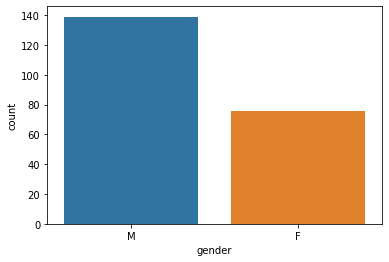

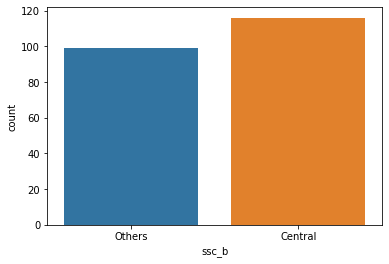

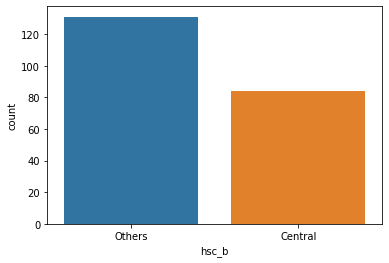

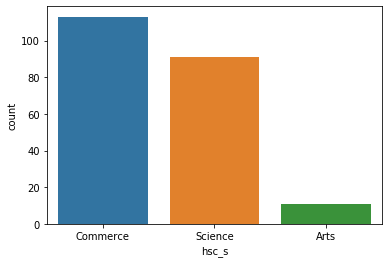

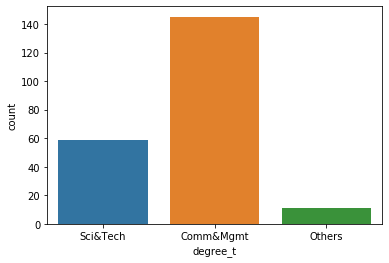

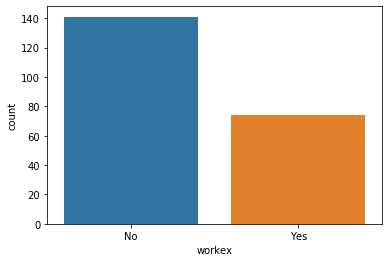

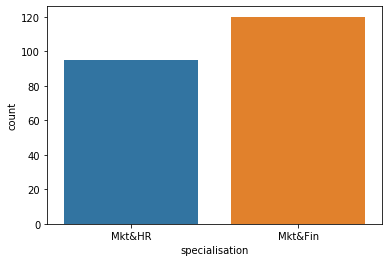

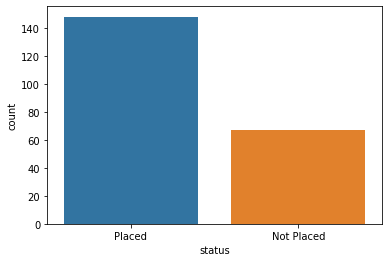

In [22]:
for i in obj:
    plt.figure()
    sns.countplot(obj[i])

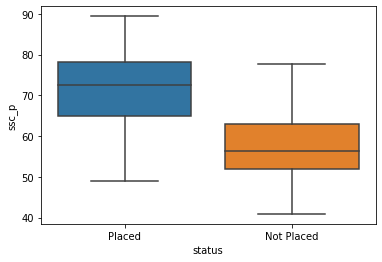

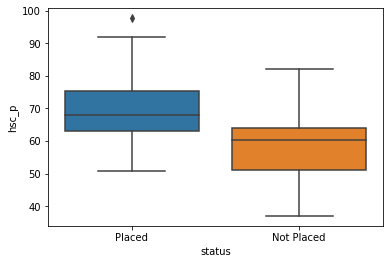

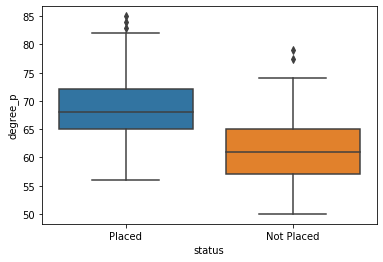

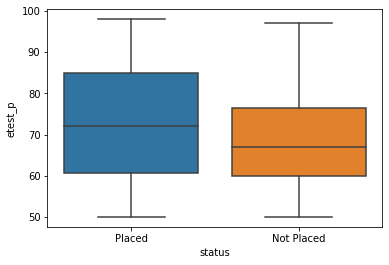

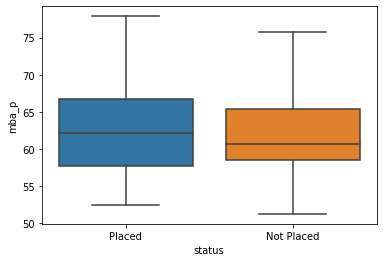

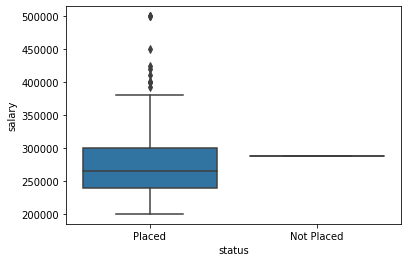

In [23]:
for i in num:
    plt.figure()
    sns.boxplot(x=df['status'],y=num[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FEFAF7308>,
      dtype=object)

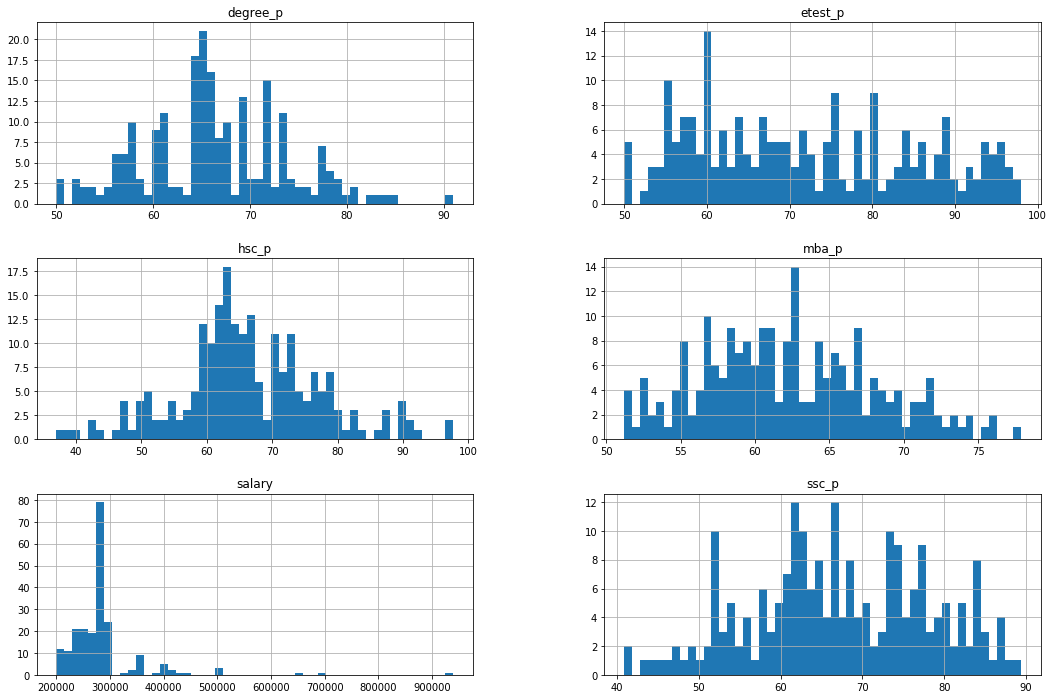

In [24]:
num.hist(bins=50,figsize=(18,12))

In [25]:
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.531279,0.534714,0.274960,0.383217,0.044894
hsc_p,0.531279,1.000000,0.454281,0.225903,0.353462,0.000333
degree_p,0.534714,0.454281,1.000000,0.234952,0.387812,-0.016134
etest_p,0.274960,0.225903,0.234952,1.000000,0.217197,0.186421
mba_p,0.383217,0.353462,0.387812,0.217197,1.000000,0.161755
salary,0.044894,0.000333,-0.016134,0.186421,0.161755,1.000000


In [26]:
num.drop(['salary'],axis=1,inplace=True)

In [28]:
obj.drop(['status'],axis=1,inplace=True)

In [29]:
for columns in obj:
    dum=pd.get_dummies(obj[columns])
    obj[dum.columns]=dum

In [33]:
obj.drop(obj.iloc[:,:7],axis=1,inplace=True)

In [36]:
e=pd.concat([num,obj],axis=1)

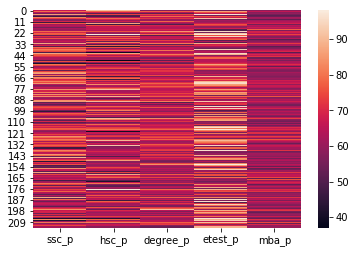

In [39]:
sns.heatmap(num)

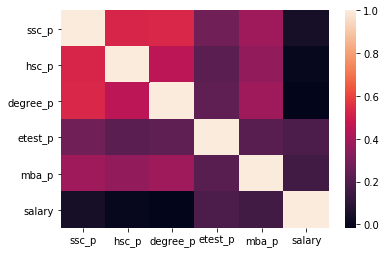

In [44]:
sns.heatmap(df.corr())

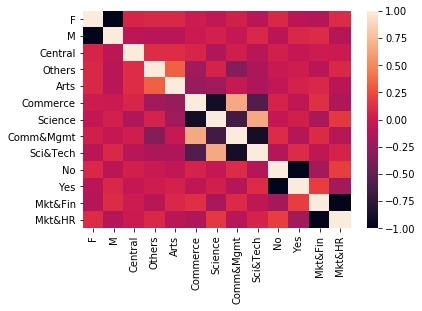

In [45]:
sns.heatmap(obj.corr())

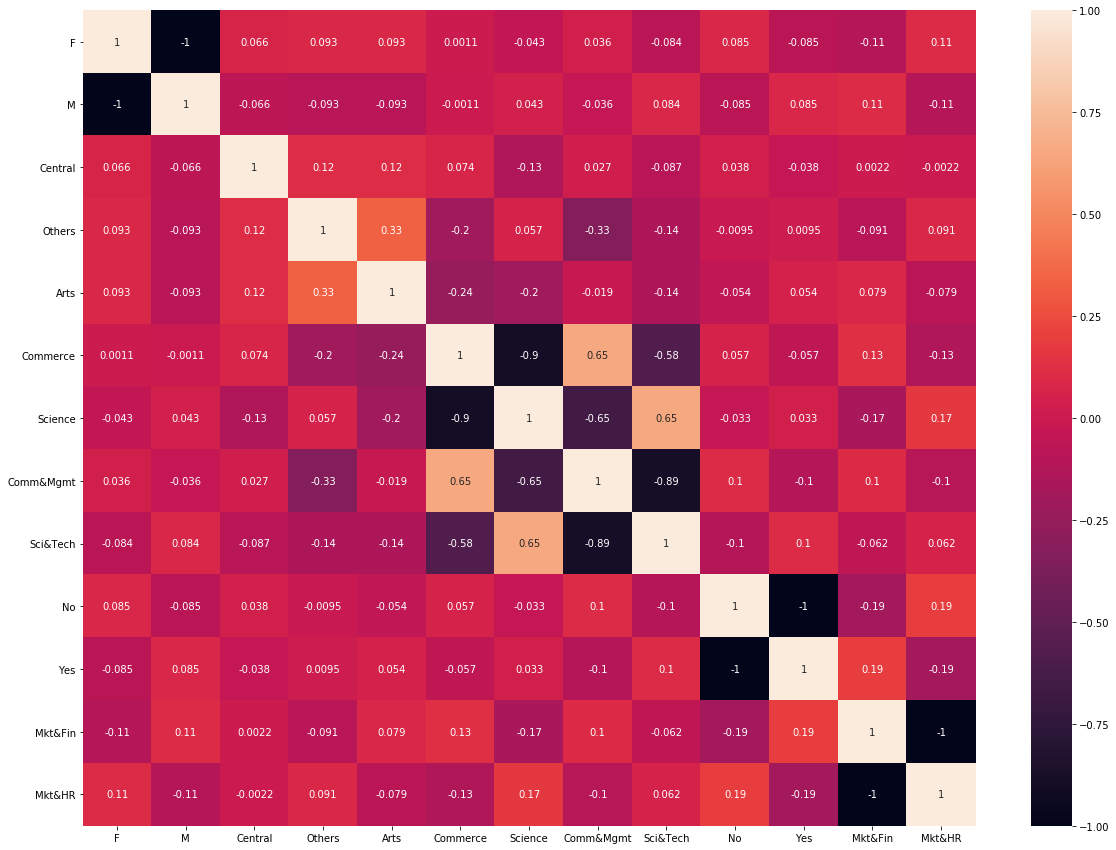

In [51]:
#fig,ax=plt.subplot(figsize=(20,15))
plt.figure(figsize=(20,15))
sns.heatmap(obj.corr(),annot=True)

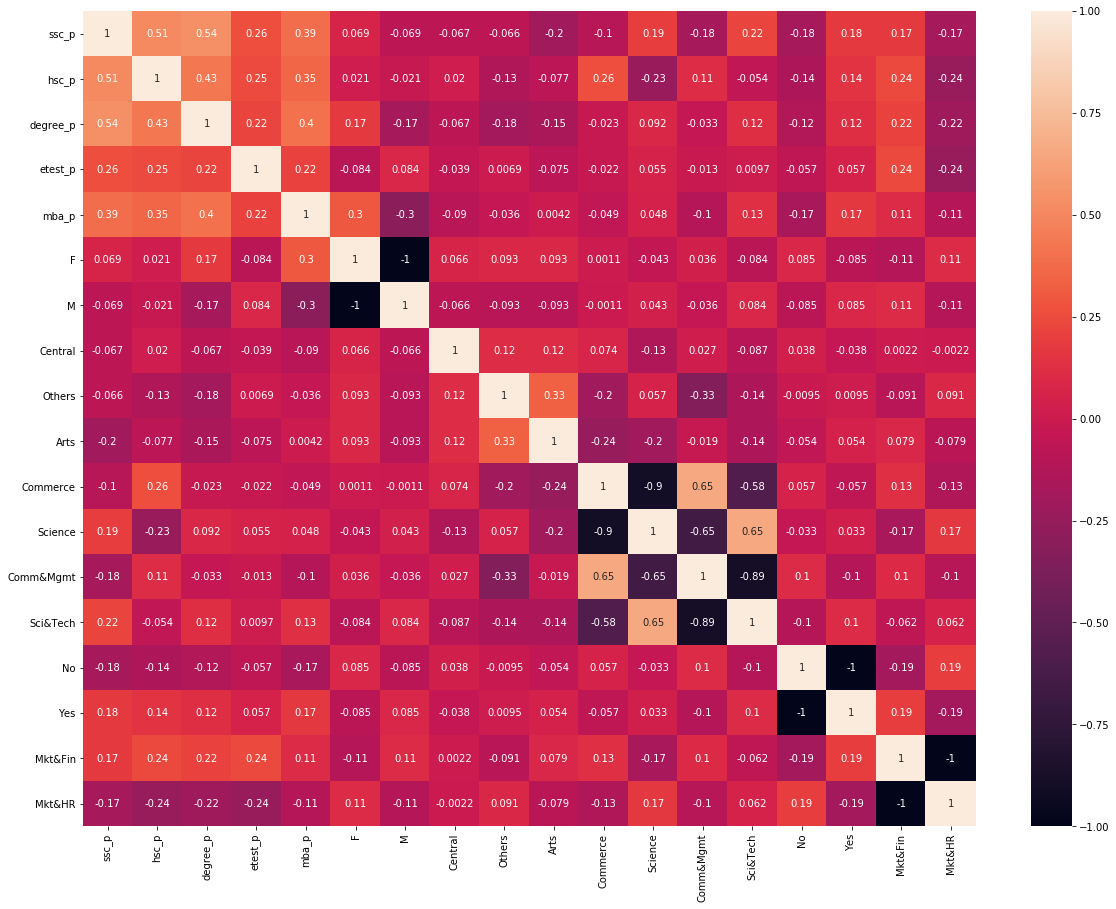

In [52]:
plt.figure(figsize=(20,15))
sns.heatmap(e.corr(),annot=True)

In [54]:
from vif import cal_vif

In [56]:
cal_vif(e).T

D:\anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
variables,ssc_p,hsc_p,degree_p,etest_p,mba_p,F,M,Central,Others,Arts,Commerce,Science,Comm&Mgmt,Sci&Tech,No,Yes,Mkt&Fin,Mkt&HR
VIF,1.9045,1.78284,1.67597,1.19446,1.49028,inf,inf,1.05455,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [64]:
from sklearn.preprocessing import LabelEncoder
df['status']=LabelEncoder().fit_transform(df['status'])

In [74]:
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,Y_train,Y_test=train_test_split(e.iloc[:211],df['status'],test_size=0.2,random_state=42)

In [88]:
fs=SelectKBest(chi2,k='all').fit_transform(X_train,Y_train)

In [97]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

In [98]:
lr=LogisticRegression()
svm=SVR(kernel='linear')

In [99]:
rf=RFECV(svm,step=1,cv=5).fit(X_train,Y_train)
rf.ranking_

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [101]:
rf.ranking_.shape

(18,)

In [103]:
lr=lr.fit(X_train,Y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [108]:
Y_predict=lr.predict(X_test)

In [109]:
lr.score(X_train,Y_train)

0.8392857142857143

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_predict,Y_test)

0.5813953488372093